In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [55]:
df = pd.read_csv('2013_movies.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


# Challenge 1

In [57]:
df['constant'] = 1

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt 

In [59]:
X, y = df["constant"], df['DomesticTotalGross']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing
X = X.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X, y)
print('Linear Regression val R^2: %.3f', lm.score(X_test, y_test))

Linear Regression val R^2: %.3f -0.049023138995961446


Text(0,0.5,'Predicted')

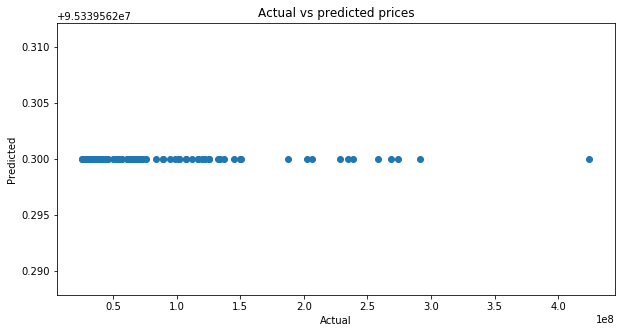

In [62]:
y_pred = lm.predict(X)
plt.figure(figsize=(10,5))
plt.scatter(y,y_pred)
plt.title('Actual vs predicted prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.13204871e-10, 0.00000000e+00, 0.00000000e+00, 9.39614612e-10,
        1.25281948e-09, 9.39614612e-10, 6.26409741e-10, 4.07166332e-09,
        5.01127793e-09, 1.19017851e-08]),
 array([-3.29328485e+08, -2.89418505e+08, -2.49508526e+08, -2.09598546e+08,
        -1.69688566e+08, -1.29778587e+08, -8.98686071e+07, -4.99586275e+07,
        -1.00486479e+07,  2.98613317e+07,  6.97713113e+07]),
 <a list of 10 Patch objects>)

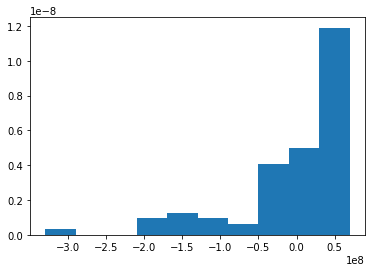

In [63]:
plt.hist(y_pred - y, normed=True, bins=10)


# CHALLENGE 2

In [64]:
X_1, y_1 = df[["constant", "Runtime"]], df['DomesticTotalGross']
#X_1, X_test_1, y_1, y_test_1 = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing
lm = LinearRegression()
lm.fit(X_1, y_1)
#print('Linear Regression val R^2: %.3f', lm.score(X_test_1, y_test_1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Predicted')

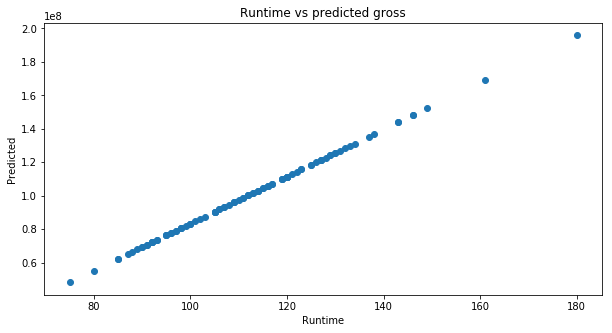

In [65]:
y_pred = lm.predict(X_1)
plt.figure(figsize=(10,5))
plt.scatter(df['Runtime'],y_pred)
plt.title('Runtime vs predicted gross')
plt.xlabel('Runtime')
plt.ylabel('Predicted')


# CHALLENGE 3

In [66]:
dummy = pd.get_dummies(df['Rating'])
df = pd.concat([df, dummy], axis = 1)
df.drop(["Rating"], axis = 1, inplace=True)

In [67]:
df

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,constant,G,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,146,2013-11-22 00:00:00,1,0,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,129,2013-05-03 00:00:00,1,0,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,108,2013-11-22 00:00:00,1,0,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,98,2013-07-03 00:00:00,1,0,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,143,2013-06-14 00:00:00,1,0,0,1,0
5,Gravity,100000000.0,274092705,Alfonso Cuaron,91,2013-10-04 00:00:00,1,0,0,1,0
6,Monsters University,NaN,268492764,Dan Scanlon,107,2013-06-21 00:00:00,1,1,0,0,0
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,161,2013-12-13 00:00:00,1,0,0,1,0
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,130,2013-05-24 00:00:00,1,0,0,1,0
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,127,2013-03-08 00:00:00,1,0,1,0,0


In [72]:
X, y = df[["constant", "G", "PG", "PG-13", "R"]], df['DomesticTotalGross']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final t

In [73]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
print('Linear Regression val R^2: %.3f', lm.score(X_test, y_test))

Linear Regression val R^2: %.3f -0.01731010798720889


Text(0,0.5,'Predicted')

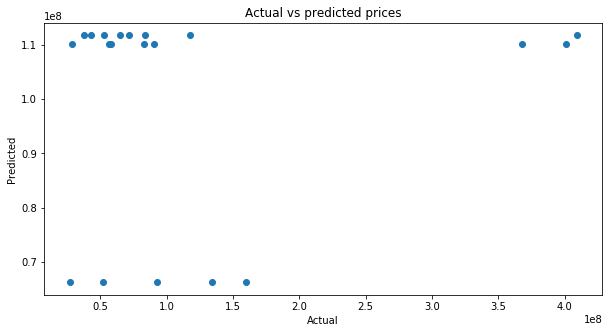

In [76]:
y_pred = lm.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.title('Actual vs predicted prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')


#### The values being predicted vs the actual are very unpredictable. 

# CHALLENGE 4

In [88]:
df= df.dropna()

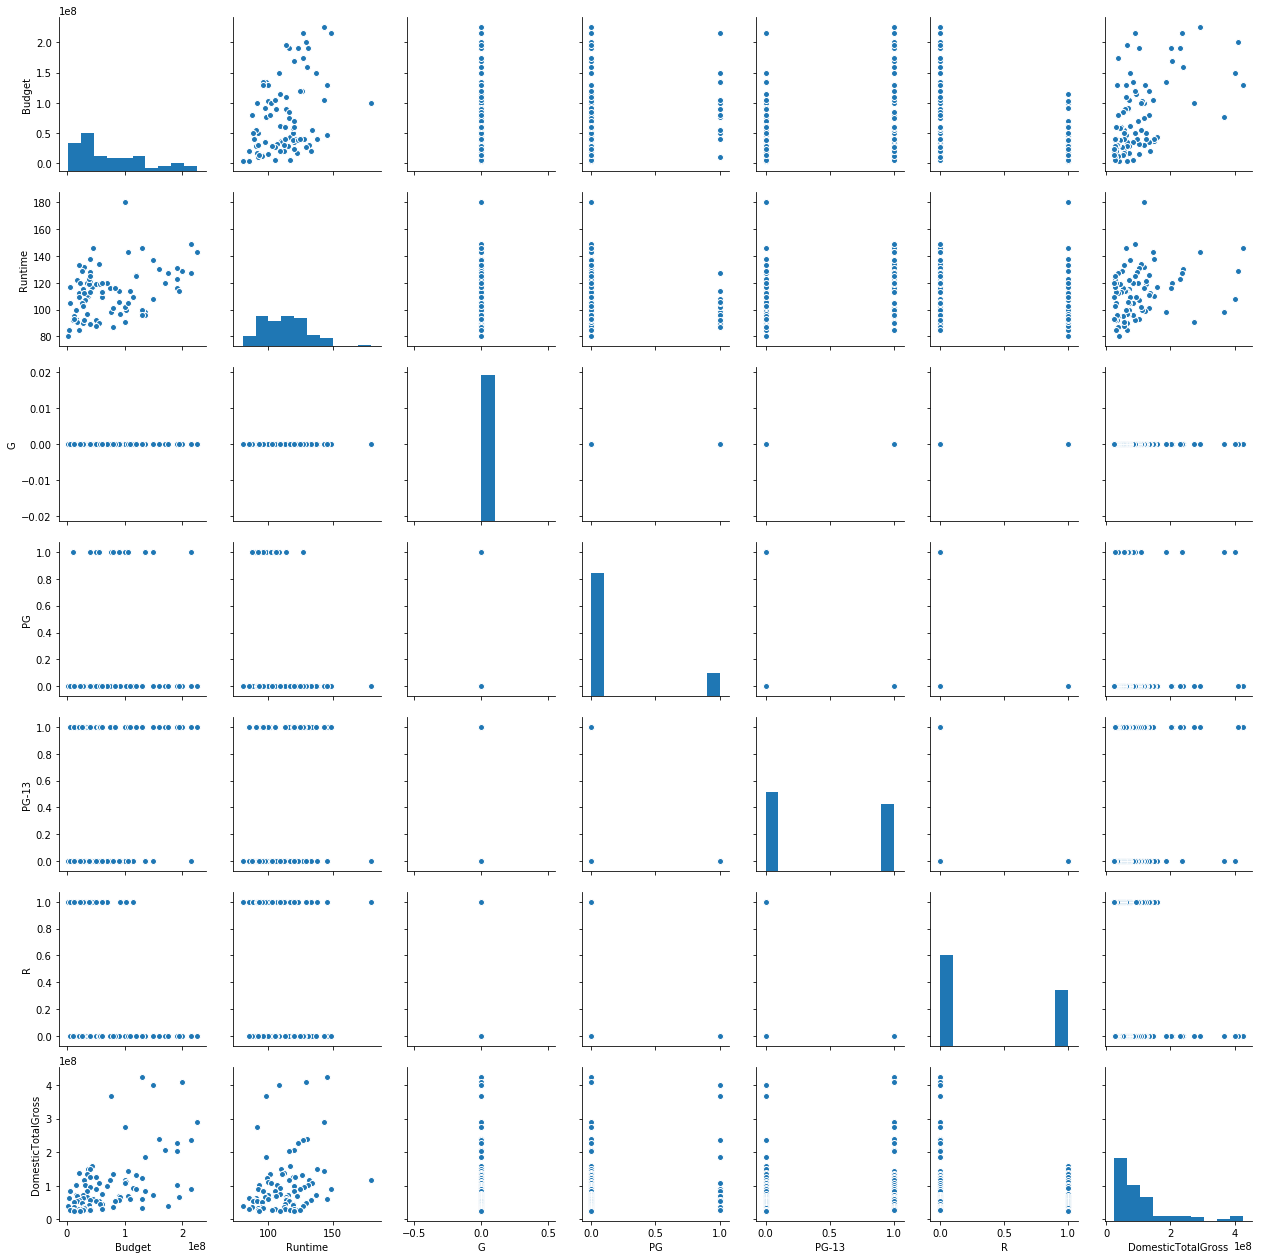

In [90]:
sns.pairplot(df[['Budget', 'Runtime', 'G', 'PG', 'PG-13', 'R', 'DomesticTotalGross']])

In [92]:
from datetime import datetime as dt

In [123]:
df["day"] = pd.to_datetime(df['ReleaseDate']).dt.day


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
df.drop(columns=["Year", "day_of_week"], inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [118]:
df["day"].unique()

array([22,  3, 14,  4, 24,  8, 16, 21, 28,  7, 13, 10, 19, 12, 26, 18, 25,
       31, 23, 11,  9, 17,  2, 15,  1, 20,  5,  6, 30, 29])

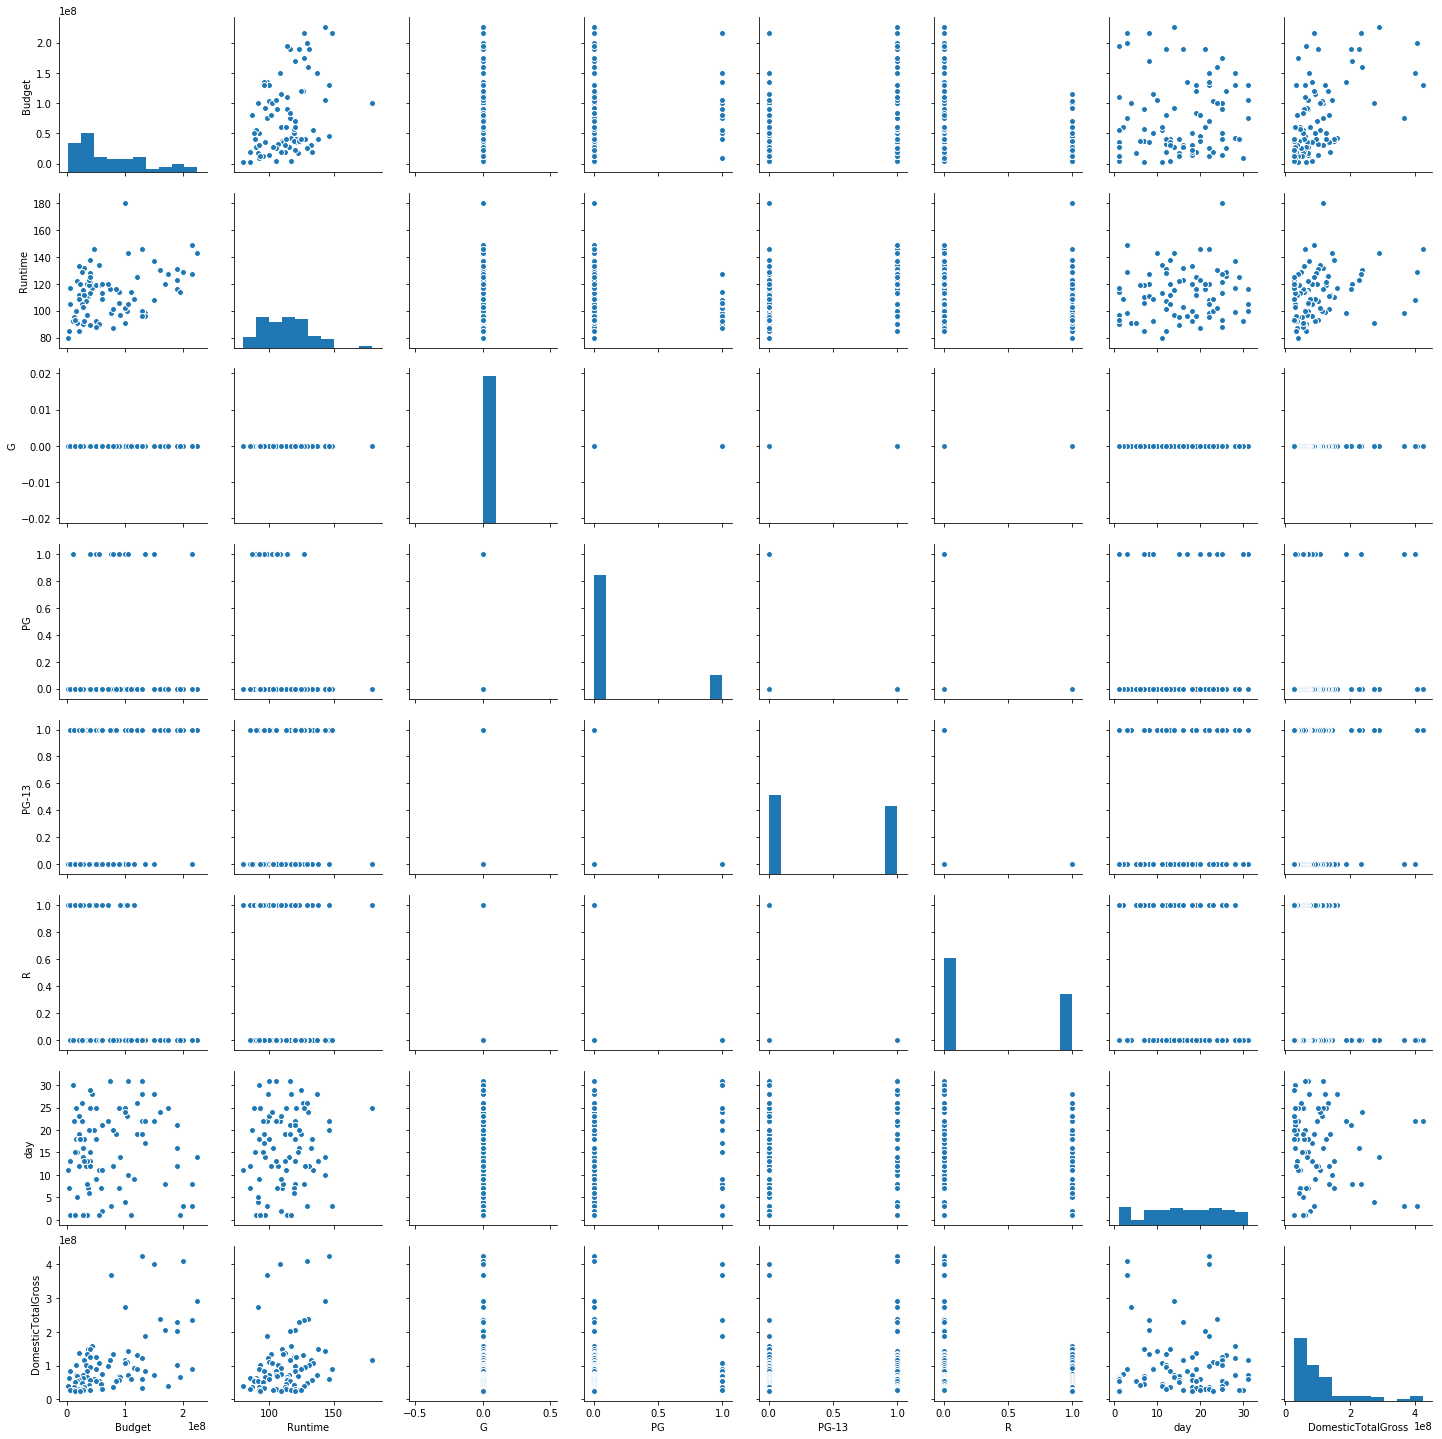

In [125]:
sns.pairplot(df[['Budget', 'Runtime', 'G', 'PG', 'PG-13', 'R', "day", 'DomesticTotalGross']])

In [131]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [132]:
X, y = df[["constant", "G", "PG", "PG-13", "R", "day"]], df['DomesticTotalGross']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final t

In [133]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.883
Date:                Tue, 16 Oct 2018   Prob (F-statistic):              0.141
Time:                        21:59:27   Log-Likelihood:                -1358.2
No. Observations:                  69   AIC:                             2724.
Df Residuals:                      65   BIC:                             2733.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    8.378e+07    1.7e+07      4.937      0.000    4.99e+07    1.18e+08
G          -3.735e-08   8.72e-09     -4.281      0.000   -5.48e-08   -1.99e-08
PG           4.46e+07    2.1e+07      2.127      0.037    2.73e+06    8.65e+07
PG-13       4.579e+07   1.46e+07      3.134      0.003    1.66e+07     7.5e+07
R          -6.619e+06   1.57e+07     -0.421      0.675    -3.8e+07    2.48e+07
day        -4.493e+05   1.25e+06     -0.359      0.721   -2.95e+06    2.05e+06
==============================================================================
Omnibus:                       34.924   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.466
Skew:                           1.793   Prob(JB):                     4.99e-16
Kurtosis:                       6.413   Cond. No.                     4.61e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.93e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### In the model above, the statistically significant contributing coefficients are the rating G, PG, PG-13. 

# Challenge 5

In [134]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
lm.score(X_test, y_test)

0.03869725462637908